In [1]:
import time
start_time = time.time()

In [2]:
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''데이터 준비 관련 라이브러'''
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

'''알고리즘 관련 라이브러'''


In [3]:
# 데이터 준비

In [4]:
# 데이터 수집
# current_path = os.getcwd()
# file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.csv'])
#data = pd.read_csv(current_path + file)

data = pd.read_csv('C:\WORK/creditcard.csv') 

In [5]:
# 데이터 탐색
data.shape

(284807, 31)

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [10]:
nanCounter = np.isnan(data).sum()

In [11]:
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
distinctCounter = data.apply(lambda x: len(x.unique()))

In [13]:
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [14]:
# 피쳐 행렬 및 레이블 배열 생성하기
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [15]:
# 피쳐 스케일링
featuresToScale = dataX.drop(['Time'],axis=1).columns

In [16]:
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [17]:
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

In [18]:
scalingFactors

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
StDev,1.958692e+00,1.651306e+00,1.516252e+00,1.415866e+00,1.380244e+00,1.332269e+00,1.237091e+00,1.194351e+00,1.098630e+00,1.088848e+00,...,7.709237e-01,7.345227e-01,7.257003e-01,6.244592e-01,6.056460e-01,5.212772e-01,4.822262e-01,4.036318e-01,3.300827e-01,250.119670


In [19]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [20]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

In [21]:
#correlation_file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'correlationMatrix.csv'])
#correlationMatrix.to_csv(current_path+correlation_file)

Text(0, 0.5, 'Frequency Percentage')

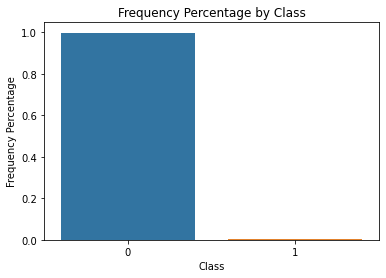

In [22]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
# ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax = sns.barplot(x=count_classes.index, y=count_classes/len(data))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

## RUS (Off)
import imblearn
print(imblearn.__version__)

from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler(sampling_strategy=0.1, random_state=2018)  # 9:1이 되도록 과대표본
DFX = data.copy().drop(['Class'],axis=1)
DFy = data['Class'].copy()
XX, yy = RUS.fit_resample(DFX, DFy)
XX = pd.DataFrame(XX, columns=XX.columns)
yy = pd.Series(yy)

print(XX.shape)
print(yy.shape)
dataX = XX.copy()
dataY = yy.copy()

#DFX.head()
#DFy.value_counts(normalize=True) # sampling_strategy=0.1 이므로  9:1이 되도록 과대표본

In [23]:
# 모델 준비

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=2018, stratify=dataY)

In [25]:
len(X_train)

190820

In [26]:
len(X_test)

93987

In [27]:
y_train.sum()/len(y_train)

0.0017293784718582959

In [28]:
y_test.sum()/len(y_test)

0.0017236426314277506

In [29]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2018)

In [30]:
# 로지스틱 회귀분석

In [31]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)

In [32]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = logReg

for train_index, cv_index in k_fold.split(np.zeros(len(X_train))
                                          ,y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, 
                               model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, 
                         predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLogisticRegression = log_loss(y_train, 
                                     predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10966441180719462
CV Log Loss:  0.10878927242405816
Training Log Loss:  0.1045933288144666
CV Log Loss:  0.10407165202063894
Training Log Loss:  0.11559083573713734
CV Log Loss:  0.11797157707737432
Training Log Loss:  0.11558053400388507
CV Log Loss:  0.11816714418476314
Training Log Loss:  0.09709727884200124
CV Log Loss:  0.09697728489318841
Logistic Regression Log Loss:  0.1091953861200046


In [33]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLogisticRegression = preds.copy()

In [34]:
precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])

In [35]:
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.74')

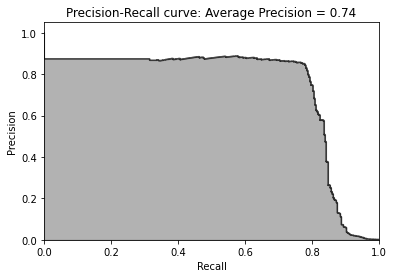

In [36]:
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

In [37]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])

In [38]:
areaUnderROC = auc(fpr, tpr)

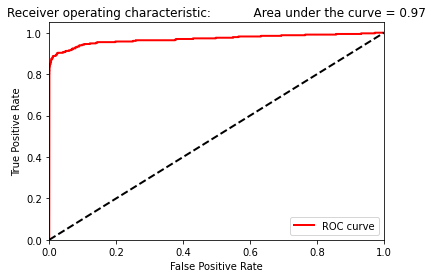

In [39]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [40]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [41]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0004570758747246713
CV Log Loss:  0.009090797476425144
Training Log Loss:  0.0004101805310493279
CV Log Loss:  0.012640234648018377
Training Log Loss:  0.00040027341363592047
CV Log Loss:  0.009990776910341356
Training Log Loss:  0.0003894650263288808
CV Log Loss:  0.006620007375395402
Training Log Loss:  0.0004291016183715201
CV Log Loss:  0.01348243171548044
Random Forests Log Loss:  0.010364849625132141


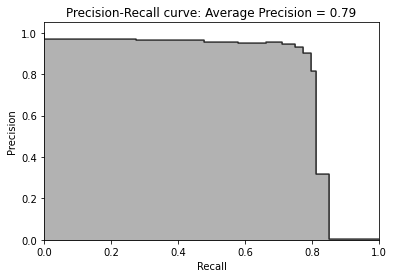

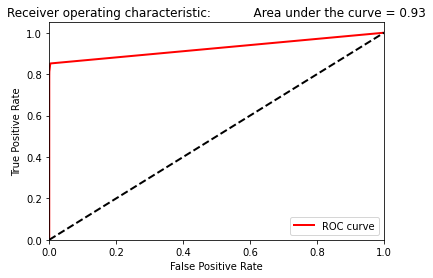

In [42]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [43]:
params_xGB = {
    'nthread':16, # 코어 수
    'learning_rate': 0.3, # 학습률 : 범위 (0 ~ 1) , 디폴트 0.3
    'gamma': 0, # 감마 : 범위 (0 ~ 무한대) , 디폴트 0
        # 이 값이 높으면 복잡성이 감소(편향 증가, 변동 감소) 
    'max_depth': 6, # max_depth : 범위 (1 ~ 무한대) , 디폴트 6 ## 트리의 최대 깊이
    'min_child_weight': 1, # min_child_weight : 범위 (0 ~ 무한대) , 디폴트 1 ## 자식노드에 필요한 가중치의 최소 합계
    'max_delta_step': 0, # max_delta_step : 범위 (0 ~ 무한대) ,  디폴트 0 ## 각 트리의 가중치 추정을 위한 최대 델타 단계
    'subsample': 1.0, # subsample : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 데이터의 샘플링 비율
    'colsample_bytree': 1.0, # colsample_bytree : 범위 (0 ~ 1) , 디폴트 1
        # 훈련 피쳐의 샘플링 비율
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018,
    'silent':1
}

In [44]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                    index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    # 수정 사항 : np.arrary 로 재정의 하면서 경고 메세지를 지울 수 있음
    best_rounds = np.argmin(np.array(bst['test-logloss-mean']))
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

[21:49:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:49:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

[21:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

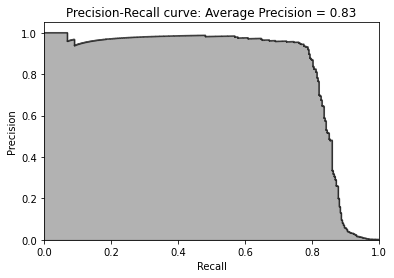

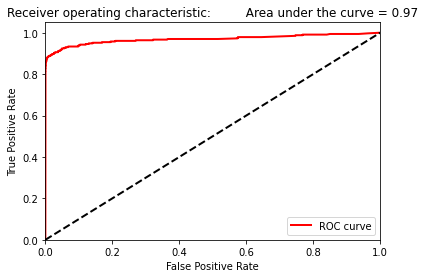

In [45]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [46]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [47]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
                gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = \
    log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.00627113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.00620105
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	vali

[141]	valid_0's binary_logloss: 0.00333338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[142]	valid_0's binary_logloss: 0.0033263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[143]	valid_0's binary_logloss: 0.00331833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[144]	valid_0's binary_logloss: 0.00331063
[145]	valid_0's binary_logloss: 0.00330324
[146]	valid_0's binary_logloss: 0.00329605
[147]	valid_0's binary_logloss: 0.00329007
[148]	valid_0's binary_logloss: 0.00328433
[149]	valid_0's binary_logloss: 0.00327801
[150]	valid_0's binary_logloss: 0.00327118
[151]	valid_0's binary_logloss: 0.00326444
[152]	valid_0's binary_logloss: 0.0032572
[153]	valid_0's binary_logloss: 0.00325128
[154]	valid_0's binary_logloss: 0.0032455
[155]	valid_0's binary_logloss: 0.00323937
[156]	valid_0's binary_logloss: 0.00323473
[157]	valid_0's binary_logloss: 0.00322917
[158]	valid_0's binary_logloss: 0.00322359
[159

[269]	valid_0's binary_logloss: 0.00289856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's binary_logloss: 0.00289779
[271]	valid_0's binary_logloss: 0.00289547
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[272]	valid_0's binary_logloss: 0.00289482
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[273]	valid_0's binary_logloss: 0.00289391
[274]	valid_0's binary_logloss: 0.00288932
[275]	valid_0's binary_logloss: 0.00288676
[276]	valid_0's binary_logloss: 0.00288379
[277]	valid_0's binary_logloss: 0.00288212
[278]	valid_0's binary_logloss: 0.00288062
[279]	valid_0's binary_logloss: 0.00287741
[280]	valid_0's binary_logloss: 0.00287636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[281]	valid_0's binary_logloss: 0.00287514
[282]	valid_0's binary_logloss: 0.00287243
[283]	valid_0's binary_logloss: 0.0028717
[284]	valid_0's binary_logloss: 0.00287042
[285]	valid_0

[392]	valid_0's binary_logloss: 0.00276992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[393]	valid_0's binary_logloss: 0.00276742
[394]	valid_0's binary_logloss: 0.00276646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[395]	valid_0's binary_logloss: 0.00276572
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[396]	valid_0's binary_logloss: 0.00276584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[397]	valid_0's binary_logloss: 0.00276533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[398]	valid_0's binary_logloss: 0.00276511
[399]	valid_0's binary_logloss: 0.00276501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	valid_0's binary_logloss: 0.00276258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[401]	valid_0's binary_logloss: 0.00276194
[LightGBM] [Warning] No further splits with p

[471]	valid_0's binary_logloss: 0.0027338
[472]	valid_0's binary_logloss: 0.00273337
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[473]	valid_0's binary_logloss: 0.00273203
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[474]	valid_0's binary_logloss: 0.00273147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[475]	valid_0's binary_logloss: 0.00273056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[476]	valid_0's binary_logloss: 0.0027305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[477]	valid_0's binary_logloss: 0.00273081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[478]	valid_0's binary_logloss: 0.0027295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[479]	valid_0's binary_logloss: 0.00272938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[480]	valid_0's 

[563]	valid_0's binary_logloss: 0.00269713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[564]	valid_0's binary_logloss: 0.00269716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[565]	valid_0's binary_logloss: 0.0026973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's binary_logloss: 0.00269714
[567]	valid_0's binary_logloss: 0.00269672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[568]	valid_0's binary_logloss: 0.00269699
[569]	valid_0's binary_logloss: 0.0026966
[570]	valid_0's binary_logloss: 0.00269662
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[571]	valid_0's binary_logloss: 0.00269677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[572]	valid_0's binary_logloss: 0.00269573
[573]	valid_0's binary_logloss: 0.00269409
[574]	valid_0's binary_logloss: 0.00269393
[LightGBM] [Warning] No further spli

[679]	valid_0's binary_logloss: 0.00267604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[680]	valid_0's binary_logloss: 0.00267612
[681]	valid_0's binary_logloss: 0.00267636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[682]	valid_0's binary_logloss: 0.00267571
[683]	valid_0's binary_logloss: 0.0026744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[684]	valid_0's binary_logloss: 0.00267427
[685]	valid_0's binary_logloss: 0.00267488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[686]	valid_0's binary_logloss: 0.00267412
[687]	valid_0's binary_logloss: 0.00267514
[688]	valid_0's binary_logloss: 0.00267541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[689]	valid_0's binary_logloss: 0.00267577
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[690]	valid_0's binary_logloss: 0.00267499
[691]	valid_0's binary_logloss: 0.0

[782]	valid_0's binary_logloss: 0.00265544
[783]	valid_0's binary_logloss: 0.00265515
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[784]	valid_0's binary_logloss: 0.00265509
[785]	valid_0's binary_logloss: 0.00265568
[786]	valid_0's binary_logloss: 0.00265602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[787]	valid_0's binary_logloss: 0.00265623
[788]	valid_0's binary_logloss: 0.00265576
[789]	valid_0's binary_logloss: 0.00265536
[790]	valid_0's binary_logloss: 0.00265483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[791]	valid_0's binary_logloss: 0.00265458
[792]	valid_0's binary_logloss: 0.00265484
[793]	valid_0's binary_logloss: 0.00265462
[794]	valid_0's binary_logloss: 0.00265311
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[795]	valid_0's binary_logloss: 0.00265327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[796]	valid_0's binary_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[893]	valid_0's binary_logloss: 0.00264063
[894]	valid_0's binary_logloss: 0.00264113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[895]	valid_0's binary_logloss: 0.00264028
[896]	valid_0's binary_logloss: 0.00264026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[897]	valid_0's binary_logloss: 0.00263979
[898]	valid_0's binary_logloss: 0.00263933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[899]	valid_0's binary_logloss: 0.00263733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's binary_logloss: 0.00263754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[901]	valid_0's binary_logloss: 0.00263802
[902]	valid_0's binary_logloss: 0.00263868
[903]	valid_0's binary_logloss: 0.0026392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[989]	valid_0's binary_logloss: 0.00263763
[990]	valid_0's binary_logloss: 0.00263696
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[991]	valid_0's binary_logloss: 0.00263735
[992]	valid_0's binary_logloss: 0.00263652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[993]	valid_0's binary_logloss: 0.00263721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[994]	valid_0's binary_logloss: 0.00263668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[995]	valid_0's binary_logloss: 0.00263632
[996]	valid_0's binary_logloss: 0.00263561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[997]	valid_0's binary_logloss: 0.00263426
[998]	valid_0's binary_logloss: 0.00263484
[999]	valid_0's binary_logloss: 0.00263454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1

[1092]	valid_0's binary_logloss: 0.00263642
[1093]	valid_0's binary_logloss: 0.00263682
[1094]	valid_0's binary_logloss: 0.00263738
[1095]	valid_0's binary_logloss: 0.00263763
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1096]	valid_0's binary_logloss: 0.00263743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1097]	valid_0's binary_logloss: 0.00263741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1098]	valid_0's binary_logloss: 0.00263663
[1099]	valid_0's binary_logloss: 0.00263574
[1100]	valid_0's binary_logloss: 0.00263617
[1101]	valid_0's binary_logloss: 0.00263646
[1102]	valid_0's binary_logloss: 0.00263737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1103]	valid_0's binary_logloss: 0.00263684
[1104]	valid_0's binary_logloss: 0.00263641
[1105]	valid_0's binary_logloss: 0.00263671
[1106]	valid_0's binary_logloss: 0.00263713
[1107]	valid_0's binary_logloss: 0.00263

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1234]	valid_0's binary_logloss: 0.00264702
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1235]	valid_0's binary_logloss: 0.00264719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1236]	valid_0's binary_logloss: 0.00264668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1237]	valid_0's binary_logloss: 0.00264674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1238]	valid_0's binary_logloss: 0.00264712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1239]	valid_0's binary_logloss: 0.0026473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1240]	valid_0's binary_logloss: 0.00264797
[1241]	valid_0's binary_logloss: 0.00264839
[1242]	valid_0's binary_logloss: 0.00264769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1243

[1347]	valid_0's binary_logloss: 0.00268529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1348]	valid_0's binary_logloss: 0.00268488
[1349]	valid_0's binary_logloss: 0.00268578
Early stopping, best iteration is:
[1149]	valid_0's binary_logloss: 0.00263261
Training Log Loss:  0.0002507937386968339
CV Log Loss:  0.0026326095470173344
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.00650326
Training unti

[125]	valid_0's binary_logloss: 0.00359676
[126]	valid_0's binary_logloss: 0.00358856
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[127]	valid_0's binary_logloss: 0.00358123
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[128]	valid_0's binary_logloss: 0.00357385
[129]	valid_0's binary_logloss: 0.00356594
[130]	valid_0's binary_logloss: 0.00356008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[131]	valid_0's binary_logloss: 0.00355313
[132]	valid_0's binary_logloss: 0.00354687
[133]	valid_0's binary_logloss: 0.00353873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[134]	valid_0's binary_logloss: 0.00353208
[135]	valid_0's binary_logloss: 0.00352513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[136]	valid_0's binary_logloss: 0.00352028
[137]	valid_0's binary_logloss: 0.00351449
[138]	valid_0's binary_logloss: 0.00350774
[139]	valid_0's binary_

[252]	valid_0's binary_logloss: 0.00308542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[253]	valid_0's binary_logloss: 0.00308411
[254]	valid_0's binary_logloss: 0.00308287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[255]	valid_0's binary_logloss: 0.00308092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[256]	valid_0's binary_logloss: 0.00308009
[257]	valid_0's binary_logloss: 0.00307773
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[258]	valid_0's binary_logloss: 0.00307543
[259]	valid_0's binary_logloss: 0.00307318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[260]	valid_0's binary_logloss: 0.00307183
[261]	valid_0's binary_logloss: 0.00307006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[262]	valid_0's binary_logloss: 0.00306916
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2

[418]	valid_0's binary_logloss: 0.0029738
[419]	valid_0's binary_logloss: 0.00297322
[420]	valid_0's binary_logloss: 0.00297273
[421]	valid_0's binary_logloss: 0.0029722
[422]	valid_0's binary_logloss: 0.0029719
[423]	valid_0's binary_logloss: 0.00297179
[424]	valid_0's binary_logloss: 0.00297134
[425]	valid_0's binary_logloss: 0.00297088
[426]	valid_0's binary_logloss: 0.00296953
[427]	valid_0's binary_logloss: 0.00296825
[428]	valid_0's binary_logloss: 0.00296795
[429]	valid_0's binary_logloss: 0.00296731
[430]	valid_0's binary_logloss: 0.00296584
[431]	valid_0's binary_logloss: 0.00296723
[432]	valid_0's binary_logloss: 0.00296762
[433]	valid_0's binary_logloss: 0.00296706
[434]	valid_0's binary_logloss: 0.00296672
[435]	valid_0's binary_logloss: 0.00296549
[436]	valid_0's binary_logloss: 0.00296544
[437]	valid_0's binary_logloss: 0.00296656
[438]	valid_0's binary_logloss: 0.00296711
[439]	valid_0's binary_logloss: 0.00296692
[440]	valid_0's binary_logloss: 0.00296836
[441]	valid_0'

[567]	valid_0's binary_logloss: 0.00293911
[568]	valid_0's binary_logloss: 0.0029404
[569]	valid_0's binary_logloss: 0.00294008
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[570]	valid_0's binary_logloss: 0.00293892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[571]	valid_0's binary_logloss: 0.00293962
[572]	valid_0's binary_logloss: 0.00293875
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[573]	valid_0's binary_logloss: 0.00293864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[574]	valid_0's binary_logloss: 0.00293825
[575]	valid_0's binary_logloss: 0.00293776
[576]	valid_0's binary_logloss: 0.00293681
[577]	valid_0's binary_logloss: 0.00293801
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[578]	valid_0's binary_logloss: 0.00293897
[579]	valid_0's binary_logloss: 0.00293939
[580]	valid_0's binary_logloss: 0.00293826
[581]	valid_0's binary_l

[682]	valid_0's binary_logloss: 0.00292495
[683]	valid_0's binary_logloss: 0.00292609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[684]	valid_0's binary_logloss: 0.00292639
[685]	valid_0's binary_logloss: 0.00292572
[686]	valid_0's binary_logloss: 0.0029264
[687]	valid_0's binary_logloss: 0.00292686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[688]	valid_0's binary_logloss: 0.00292678
[689]	valid_0's binary_logloss: 0.00292837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[690]	valid_0's binary_logloss: 0.00292811
[691]	valid_0's binary_logloss: 0.00292863
[692]	valid_0's binary_logloss: 0.00292874
[693]	valid_0's binary_logloss: 0.00292916
[694]	valid_0's binary_logloss: 0.0029288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[695]	valid_0's binary_logloss: 0.00292814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[696]	valid_0's binary_lo

[803]	valid_0's binary_logloss: 0.00294133
[804]	valid_0's binary_logloss: 0.00294102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[805]	valid_0's binary_logloss: 0.0029409
[806]	valid_0's binary_logloss: 0.00294199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[807]	valid_0's binary_logloss: 0.00294177
[808]	valid_0's binary_logloss: 0.00294178
[809]	valid_0's binary_logloss: 0.00294179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[810]	valid_0's binary_logloss: 0.0029418
[811]	valid_0's binary_logloss: 0.00294293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[812]	valid_0's binary_logloss: 0.00294271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[813]	valid_0's binary_logloss: 0.00294224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[814]	valid_0's binary_logloss: 0.00294179
[815]	valid_0's binary_logloss: 0.00

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[18]	valid_0's binary_logloss: 0.00494693
[19]	valid_0's binary_logloss: 0.00490706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's binary_logloss: 0.00486318
[21]	valid_0's binary_logloss: 0.00482316
[22]	valid_0's binary_logloss: 0.00478233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[23]	valid_0's binary_logloss: 0.00474581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[24]	valid_0's binary_logloss: 0.0047082
[25]	valid_0's binary_logloss: 0.00467216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[26]	valid_0's binary_logloss: 0.00463458
[27]	valid_0's binary_logloss: 0.00459742
[28]	valid_0's binary_logloss: 0.0045643
[29]	valid_0's binary_logloss: 0.00453048
[30]	valid_0's binary_logloss: 0.00449906
[31]	valid_0's binary_logloss: 0.00446749
[32]	valid_0's binary_logloss: 0.004434

[192]	valid_0's binary_logloss: 0.00256544
[193]	valid_0's binary_logloss: 0.0025603
[194]	valid_0's binary_logloss: 0.00255654
[195]	valid_0's binary_logloss: 0.00255327
[196]	valid_0's binary_logloss: 0.00255021
[197]	valid_0's binary_logloss: 0.00254783
[198]	valid_0's binary_logloss: 0.00254549
[199]	valid_0's binary_logloss: 0.0025404
[200]	valid_0's binary_logloss: 0.00253896
[201]	valid_0's binary_logloss: 0.00253753
[202]	valid_0's binary_logloss: 0.00253565
[203]	valid_0's binary_logloss: 0.00253354
[204]	valid_0's binary_logloss: 0.00253142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[205]	valid_0's binary_logloss: 0.00252883
[206]	valid_0's binary_logloss: 0.00252682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[207]	valid_0's binary_logloss: 0.00252424
[208]	valid_0's binary_logloss: 0.00252218
[209]	valid_0's binary_logloss: 0.00252098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[21

[347]	valid_0's binary_logloss: 0.00235538
[348]	valid_0's binary_logloss: 0.00235346
[349]	valid_0's binary_logloss: 0.00235336
[350]	valid_0's binary_logloss: 0.00235274
[351]	valid_0's binary_logloss: 0.00235263
[352]	valid_0's binary_logloss: 0.00235135
[353]	valid_0's binary_logloss: 0.00235068
[354]	valid_0's binary_logloss: 0.00235061
[355]	valid_0's binary_logloss: 0.00235049
[356]	valid_0's binary_logloss: 0.00234888
[357]	valid_0's binary_logloss: 0.00234699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[358]	valid_0's binary_logloss: 0.00234666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[359]	valid_0's binary_logloss: 0.00234629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[360]	valid_0's binary_logloss: 0.00234597
[361]	valid_0's binary_logloss: 0.00234501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[362]	valid_0's binary_logloss: 0.0023447
[LightGBM] [W

[442]	valid_0's binary_logloss: 0.002305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[443]	valid_0's binary_logloss: 0.00230477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[444]	valid_0's binary_logloss: 0.00230463
[445]	valid_0's binary_logloss: 0.00230313
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[446]	valid_0's binary_logloss: 0.00230252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[447]	valid_0's binary_logloss: 0.00230196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[448]	valid_0's binary_logloss: 0.002301
[449]	valid_0's binary_logloss: 0.00230012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[450]	valid_0's binary_logloss: 0.00230003
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[451]	valid_0's binary_logloss: 0.00229943
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[532]	valid_0's binary_logloss: 0.00226291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[533]	valid_0's binary_logloss: 0.00226284
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[534]	valid_0's binary_logloss: 0.00226256
[535]	valid_0's binary_logloss: 0.00226327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[536]	valid_0's binary_logloss: 0.00226328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[537]	valid_0's binary_logloss: 0.00226301
[538]	valid_0's binary_logloss: 0.00226262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[539]	valid_0's binary_logloss: 0.00226226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[540]	valid_0's binary_logloss: 0.00226183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[541]	valid_0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[624]	valid_0's binary_logloss: 0.00223955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[625]	valid_0's binary_logloss: 0.00223955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[626]	valid_0's binary_logloss: 0.00223974
[627]	valid_0's binary_logloss: 0.00224003
[628]	valid_0's binary_logloss: 0.00224119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[629]	valid_0's binary_logloss: 0.00224033
[630]	valid_0's binary_logloss: 0.00224065
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[631]	valid_0's binary_logloss: 0.00224031
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[632]	valid_0's binary_logloss: 0.00224039
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[633]	valid_0's binary_logloss: 0.00224008
[LightGBM] [Warning] No further splits with p

[716]	valid_0's binary_logloss: 0.0022379
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[717]	valid_0's binary_logloss: 0.00223772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[718]	valid_0's binary_logloss: 0.00223794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[719]	valid_0's binary_logloss: 0.00223743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[720]	valid_0's binary_logloss: 0.00223684
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[721]	valid_0's binary_logloss: 0.00223591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[722]	valid_0's binary_logloss: 0.00223584
[723]	valid_0's binary_logloss: 0.00223514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[724]	valid_0's binary_logloss: 0.00223527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[725]	valid_0'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[809]	valid_0's binary_logloss: 0.00224461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[810]	valid_0's binary_logloss: 0.00224442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[811]	valid_0's binary_logloss: 0.00224461
[812]	valid_0's binary_logloss: 0.00224408
[813]	valid_0's binary_logloss: 0.00224398
[814]	valid_0's binary_logloss: 0.00224485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[815]	valid_0's binary_logloss: 0.00224479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[816]	valid_0's binary_logloss: 0.002245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[817]	valid_0's binary_logloss: 0.0022453
[818]	valid_0's binary_logloss: 0.00224563
[819]	valid_0's binary_logloss: 0.00224494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[820]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[928]	valid_0's binary_logloss: 0.00223959
[929]	valid_0's binary_logloss: 0.00223886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[930]	valid_0's binary_logloss: 0.0022385
[931]	valid_0's binary_logloss: 0.0022384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[932]	valid_0's binary_logloss: 0.00223833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[933]	valid_0's binary_logloss: 0.00223835
[934]	valid_0's binary_logloss: 0.0022373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[935]	valid_0's binary_logloss: 0.00223755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[936]	valid_0's binary_logloss: 0.00223806
[937]	valid_0's binary_logloss: 0.00223862
[938]	valid_0's binary_logloss: 0.00223858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[939]

[96]	valid_0's binary_logloss: 0.00360559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	valid_0's binary_logloss: 0.00359477
[98]	valid_0's binary_logloss: 0.00358441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	valid_0's binary_logloss: 0.0035737
[100]	valid_0's binary_logloss: 0.00356305
[101]	valid_0's binary_logloss: 0.00355205
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[102]	valid_0's binary_logloss: 0.00354168
[103]	valid_0's binary_logloss: 0.00353134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[104]	valid_0's binary_logloss: 0.00352072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[105]	valid_0's binary_logloss: 0.00351027
[106]	valid_0's binary_logloss: 0.00350009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[107]	valid_0's binary_logloss: 0.00348999
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[234]	valid_0's binary_logloss: 0.00285494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[235]	valid_0's binary_logloss: 0.00285358
[236]	valid_0's binary_logloss: 0.00285179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[237]	valid_0's binary_logloss: 0.00284956
[238]	valid_0's binary_logloss: 0.00284857
[239]	valid_0's binary_logloss: 0.00284334
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[240]	valid_0's binary_logloss: 0.00284072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[241]	valid_0's binary_logloss: 0.00283861
[242]	valid_0's binary_logloss: 0.00283764
[243]	valid_0's binary_logloss: 0.0028373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[244]	valid_0's binary_logloss: 0.0028353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[245

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[384]	valid_0's binary_logloss: 0.00270226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[385]	valid_0's binary_logloss: 0.00270227
[386]	valid_0's binary_logloss: 0.00270229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[387]	valid_0's binary_logloss: 0.00270187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[388]	valid_0's binary_logloss: 0.00270216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[389]	valid_0's binary_logloss: 0.00270219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[390]	valid_0's binary_logloss: 0.00270163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[391]	valid_0's binary_logloss: 0.00270154
[392]	valid_0's binary_logloss: 0.00269948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[393]	valid_0

[470]	valid_0's binary_logloss: 0.00268783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[471]	valid_0's binary_logloss: 0.00268797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[472]	valid_0's binary_logloss: 0.00268807
[473]	valid_0's binary_logloss: 0.00268812
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[474]	valid_0's binary_logloss: 0.00268791
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[475]	valid_0's binary_logloss: 0.00268857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[476]	valid_0's binary_logloss: 0.00268842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[477]	valid_0's binary_logloss: 0.00268686
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[478]	valid_0's binary_logloss: 0.00268711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[479]	valid_0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[556]	valid_0's binary_logloss: 0.00267135
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[557]	valid_0's binary_logloss: 0.00267145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[558]	valid_0's binary_logloss: 0.00267128
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[559]	valid_0's binary_logloss: 0.00267146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[560]	valid_0's binary_logloss: 0.00267145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[561]	valid_0's binary_logloss: 0.00267117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[562]	valid_0's binary_logloss: 0.00267109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[563]	valid_0's binary_logloss: 0.00267103
[LightGBM] [Warning] No further splits with positive gai

[644]	valid_0's binary_logloss: 0.00266026
[645]	valid_0's binary_logloss: 0.00266076
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[646]	valid_0's binary_logloss: 0.00265997
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[647]	valid_0's binary_logloss: 0.00266014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[648]	valid_0's binary_logloss: 0.00265999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[649]	valid_0's binary_logloss: 0.00266017
[650]	valid_0's binary_logloss: 0.0026593
[651]	valid_0's binary_logloss: 0.0026585
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[652]	valid_0's binary_logloss: 0.00265836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[653]	valid_0's binary_logloss: 0.00265877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[654]	valid_0's binary_logloss: 0.00265817
[Lig

[737]	valid_0's binary_logloss: 0.00265547
[738]	valid_0's binary_logloss: 0.00265567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[739]	valid_0's binary_logloss: 0.00265559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[740]	valid_0's binary_logloss: 0.00265586
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[741]	valid_0's binary_logloss: 0.00265513
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[742]	valid_0's binary_logloss: 0.0026556
[743]	valid_0's binary_logloss: 0.00265575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[744]	valid_0's binary_logloss: 0.0026559
[745]	valid_0's binary_logloss: 0.00265653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[746]	valid_0's binary_logloss: 0.00265727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[747]	valid_0's binary_logloss: 0.00265804
[Lig

[835]	valid_0's binary_logloss: 0.00266076
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[836]	valid_0's binary_logloss: 0.00266063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[837]	valid_0's binary_logloss: 0.00266035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[838]	valid_0's binary_logloss: 0.0026608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[839]	valid_0's binary_logloss: 0.00266161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[840]	valid_0's binary_logloss: 0.0026624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[841]	valid_0's binary_logloss: 0.00266234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[842]	valid_0's binary_logloss: 0.00266199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[843]	valid_0's binary_logloss: 0.0026632
[LightGBM] [Warn

[927]	valid_0's binary_logloss: 0.00267605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[928]	valid_0's binary_logloss: 0.00267602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[929]	valid_0's binary_logloss: 0.00267609
[930]	valid_0's binary_logloss: 0.00267588
[931]	valid_0's binary_logloss: 0.00267582
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[932]	valid_0's binary_logloss: 0.00267589
[933]	valid_0's binary_logloss: 0.00267594
[934]	valid_0's binary_logloss: 0.00267575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[935]	valid_0's binary_logloss: 0.00267548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[936]	valid_0's binary_logloss: 0.0026741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[937]	valid_0's binary_logloss: 0.00267418
[938]	valid_0's binary_logloss: 0.00267402
[LightGBM] [Warning] No further spl

[15]	valid_0's binary_logloss: 0.00592054
[16]	valid_0's binary_logloss: 0.00588652
[17]	valid_0's binary_logloss: 0.00585141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[18]	valid_0's binary_logloss: 0.00581567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[19]	valid_0's binary_logloss: 0.0057843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's binary_logloss: 0.00574858
[21]	valid_0's binary_logloss: 0.00571364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[22]	valid_0's binary_logloss: 0.00568501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[23]	valid_0's binary_logloss: 0.00565575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[24]	valid_0's binary_logloss: 0.00562466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[25]	valid_0's binary_logloss: 0.00559369
[LightGBM] [Wa

[152]	valid_0's binary_logloss: 0.00399433
[153]	valid_0's binary_logloss: 0.00399056
[154]	valid_0's binary_logloss: 0.00398708
[155]	valid_0's binary_logloss: 0.00398251
[156]	valid_0's binary_logloss: 0.00397898
[157]	valid_0's binary_logloss: 0.00397552
[158]	valid_0's binary_logloss: 0.00397122
[159]	valid_0's binary_logloss: 0.00396735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's binary_logloss: 0.00396443
[161]	valid_0's binary_logloss: 0.00395999
[162]	valid_0's binary_logloss: 0.00395713
[163]	valid_0's binary_logloss: 0.00395434
[164]	valid_0's binary_logloss: 0.00395164
[165]	valid_0's binary_logloss: 0.00394897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[166]	valid_0's binary_logloss: 0.00394505
[167]	valid_0's binary_logloss: 0.00394259
[168]	valid_0's binary_logloss: 0.00393845
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[169]	valid_0's binary_logloss: 0.00393466
[

[259]	valid_0's binary_logloss: 0.00375452
[260]	valid_0's binary_logloss: 0.00375364
[261]	valid_0's binary_logloss: 0.0037521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[262]	valid_0's binary_logloss: 0.00375058
[263]	valid_0's binary_logloss: 0.00374989
[264]	valid_0's binary_logloss: 0.00375023
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[265]	valid_0's binary_logloss: 0.00374925
[266]	valid_0's binary_logloss: 0.00374862
[267]	valid_0's binary_logloss: 0.00374744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[268]	valid_0's binary_logloss: 0.00374523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[269]	valid_0's binary_logloss: 0.00374469
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[270]	valid_0's binary_logloss: 0.00374282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[271]	valid_0's binary_logloss: 0.0

[373]	valid_0's binary_logloss: 0.00365495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[374]	valid_0's binary_logloss: 0.00365531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[375]	valid_0's binary_logloss: 0.0036556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[376]	valid_0's binary_logloss: 0.00365363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[377]	valid_0's binary_logloss: 0.00365341
[378]	valid_0's binary_logloss: 0.00365267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[379]	valid_0's binary_logloss: 0.00365089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[380]	valid_0's binary_logloss: 0.00365072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[381]	valid_0's binary_logloss: 0.0036507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[382]	valid_0's

[470]	valid_0's binary_logloss: 0.00362827
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[471]	valid_0's binary_logloss: 0.00362744
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[472]	valid_0's binary_logloss: 0.00362758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[473]	valid_0's binary_logloss: 0.00362805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[474]	valid_0's binary_logloss: 0.00362749
[475]	valid_0's binary_logloss: 0.00362638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[476]	valid_0's binary_logloss: 0.00362557
[477]	valid_0's binary_logloss: 0.00362458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[478]	valid_0's binary_logloss: 0.00362345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[479]	valid_0's binary_logloss: 0.00362341
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[652]	valid_0's binary_logloss: 0.00360289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[653]	valid_0's binary_logloss: 0.00360226
[654]	valid_0's binary_logloss: 0.00360306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[655]	valid_0's binary_logloss: 0.00360331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[656]	valid_0's binary_logloss: 0.0036027
[657]	valid_0's binary_logloss: 0.00360267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[658]	valid_0's binary_logloss: 0.00360249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[659]	valid_0's binary_logloss: 0.00360286
[660]	valid_0's binary_logloss: 0.00360253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[661]	valid_0's binary_logloss: 0.0036019
[662]	valid_0's binary_logloss: 0.00360271
[Lig

[754]	valid_0's binary_logloss: 0.00362048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[755]	valid_0's binary_logloss: 0.0036207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[756]	valid_0's binary_logloss: 0.00362015
[757]	valid_0's binary_logloss: 0.00362095
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[758]	valid_0's binary_logloss: 0.00362179
[759]	valid_0's binary_logloss: 0.0036215
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[760]	valid_0's binary_logloss: 0.00362136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[761]	valid_0's binary_logloss: 0.00362132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[762]	valid_0's binary_logloss: 0.00362179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[763]	valid_0's binary_logloss: 0.00362125
[LightGBM] [Warning] No further splits with pos

Training Log Loss:  0.0005292797023079082
CV Log Loss:  0.0036019003071684464
LightGBM Gradient Boosting Log Loss:  0.00280873207026739


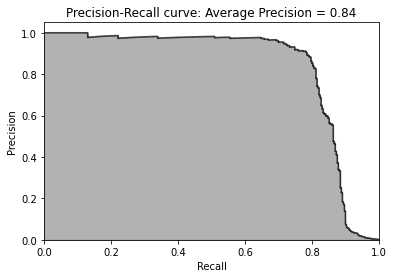

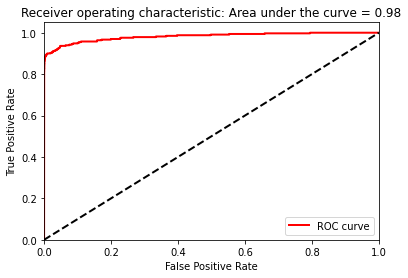

In [48]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [49]:
# 테스트 데이터 셋으로 4가지 모델 평가

In [50]:
predictionsTestSetLogisticRegression = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = \
    logReg.predict_proba(X_test)[:,1]
logLossTestSetLogisticRegression = \
    log_loss(y_test, predictionsTestSetLogisticRegression)

In [51]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

In [52]:
predictionsTestSetXGBoostGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
    bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = \
    log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

In [53]:
predictionsTestSetLightGBMGradientBoosting = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = \
    gbm.predict(X_test, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = \
    log_loss(y_test, predictionsTestSetLightGBMGradientBoosting)

In [54]:
print("Log Loss of Logistic Regression on Test Set: ", \
          logLossTestSetLogisticRegression)
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
          logLossTestSetXGBoostGradientBoosting)
print("Log Loss of LightGBM Gradient Boosting on Test Set: ", \
          logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression on Test Set:  0.0967476560375709
Log Loss of Random Forests on Test Set:  0.009018284462863804
Log Loss of XGBoost Gradient Boosting on Test Set:  0.002424374468390823
Log Loss of LightGBM Gradient Boosting on Test Set:  0.002523122137335972


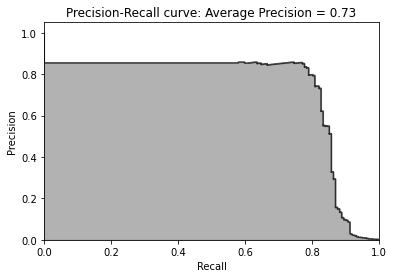

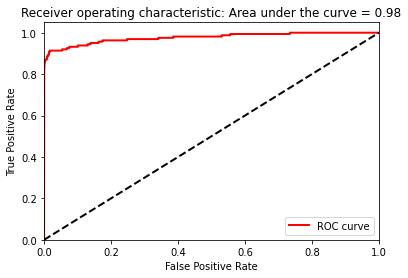

In [55]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLogisticRegression)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLogisticRegression)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

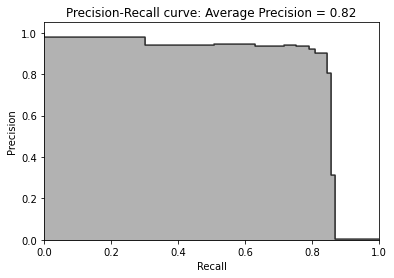

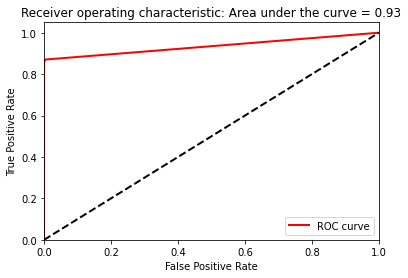

In [56]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

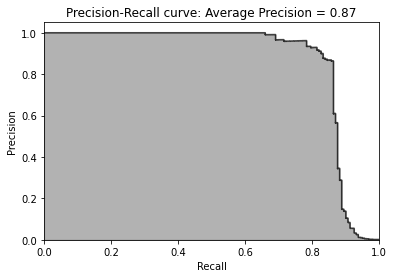

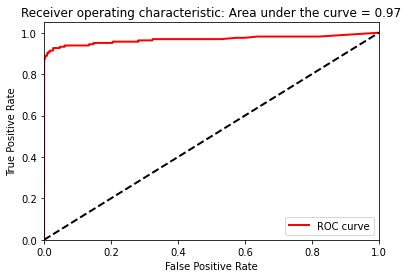

In [57]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

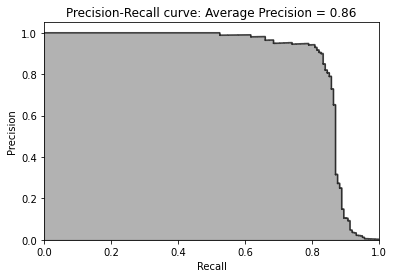

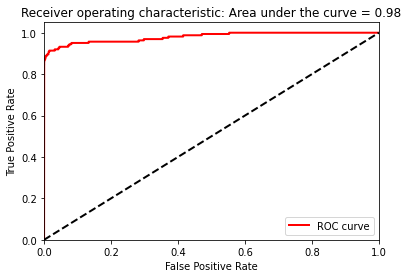

In [58]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
average_precision = \
    average_precision_score(y_test,predictionsTestSetLightGBMGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [59]:
# 앙상블

In [60]:
predictionsBasedOnKFoldsFourModels = pd.DataFrame(data=[],index=y_train.index)
predictionsBasedOnKFoldsFourModels = predictionsBasedOnKFoldsFourModels.join(
    predictionsBasedOnKFoldsLogisticRegression['prediction'].astype(float), \
    how='left').join(predictionsBasedOnKFoldsRandomForests['prediction'] \
    .astype(float),how='left',rsuffix="2").join( \
    predictionsBasedOnKFoldsXGBoostGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="3").join( \
    predictionsBasedOnKFoldsLightGBMGradientBoosting['prediction'].astype(float), \
    how='left',rsuffix="4")
predictionsBasedOnKFoldsFourModels.columns = \
    ['predsLR','predsRF','predsXGB','predsLightGBM']

In [61]:
X_trainWithPredictions = \
    X_train.merge(predictionsBasedOnKFoldsFourModels,
                  left_index=True,right_index=True)

In [62]:
params_lightGB = {
    'task': 'train',
    'application':'binary',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': 0,
    'num_threads':16
}

In [63]:
trainingScores = []
cvScores = []
predictionsBasedOnKFoldsEnsemble = \
    pd.DataFrame(data=[],index=y_train.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), \
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = \
        X_trainWithPredictions.iloc[train_index,:], \
        X_trainWithPredictions.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, \
        gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'] = \
        gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFoldsEnsemble.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossEnsemble = log_loss(y_train, \
        predictionsBasedOnKFoldsEnsemble.loc[:,'prediction'])
print('Ensemble Log Loss: ', loglossEnsemble)

[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.00552298
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00545912
[3]	valid_0's binary_logloss: 0.00540874
[4]	valid_0's binary_logloss: 0.00536259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_logloss: 0.00531639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[148]	valid_0's binary_logloss: 0.00303121
[149]	valid_0's binary_logloss: 0.00302649
[150]	valid_0's binary_logloss: 0.00302182
[151]	valid_0's binary_logloss: 0.00301727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[152]	valid_0's binary_logloss: 0.00301136
[153]	valid_0's binary_logloss: 0.00300617
[154]	valid_0's binary_logloss: 0.00300148
[155]	valid_0's binary_logloss: 0.00299717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[156]	valid_0's binary_logloss: 0.0029917
[157]	valid_0's binary_logloss: 0.0029881
[158]	valid_0's binary_logloss: 0.00298494
[159]	valid_0's binary_logloss: 0.00298092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's binary_logloss: 0.00297533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[161]	valid_0's binary_logloss: 0.00297127
[162]	valid_0's binary_logloss: 0.00296691
[163]	valid_0's binary_logloss: 0.00296367
[LightGBM] [Wa

[300]	valid_0's binary_logloss: 0.00267835
[301]	valid_0's binary_logloss: 0.00267832
[302]	valid_0's binary_logloss: 0.00267693
[303]	valid_0's binary_logloss: 0.00267597
[304]	valid_0's binary_logloss: 0.00267549
[305]	valid_0's binary_logloss: 0.0026749
[306]	valid_0's binary_logloss: 0.00267329
[307]	valid_0's binary_logloss: 0.00267283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[308]	valid_0's binary_logloss: 0.00267237
[309]	valid_0's binary_logloss: 0.00267085
[310]	valid_0's binary_logloss: 0.00267029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[311]	valid_0's binary_logloss: 0.00266936
[312]	valid_0's binary_logloss: 0.00266824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[313]	valid_0's binary_logloss: 0.00266781
[314]	valid_0's binary_logloss: 0.00266689
[315]	valid_0's binary_logloss: 0.00266382
[316]	valid_0's binary_logloss: 0.0026627
[317]	valid_0's binary_logloss: 0.00266116
[31

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[422]	valid_0's binary_logloss: 0.00259757
[423]	valid_0's binary_logloss: 0.00259755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[424]	valid_0's binary_logloss: 0.00259697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[425]	valid_0's binary_logloss: 0.00259682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[426]	valid_0's binary_logloss: 0.00259606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[427]	valid_0's binary_logloss: 0.00259541
[428]	valid_0's binary_logloss: 0.00259528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[429]	valid_0's binary_logloss: 0.00259467
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[430]	valid_0's binary_logloss: 0.00259394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[431]	valid_0

[521]	valid_0's binary_logloss: 0.0025778
[522]	valid_0's binary_logloss: 0.00257832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[523]	valid_0's binary_logloss: 0.00257793
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[524]	valid_0's binary_logloss: 0.00257805
[525]	valid_0's binary_logloss: 0.00257858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[526]	valid_0's binary_logloss: 0.00257948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[527]	valid_0's binary_logloss: 0.00257933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[528]	valid_0's binary_logloss: 0.00258013
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[529]	valid_0's binary_logloss: 0.00257952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[530]	valid_0's binary_logloss: 0.00257979
[LightGBM] [Warning] No further splits with po

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[614]	valid_0's binary_logloss: 0.00259567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[615]	valid_0's binary_logloss: 0.00259558
[616]	valid_0's binary_logloss: 0.00259516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[617]	valid_0's binary_logloss: 0.00259503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[618]	valid_0's binary_logloss: 0.00259571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[619]	valid_0's binary_logloss: 0.00259565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[620]	valid_0's binary_logloss: 0.00259639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[621]	valid_0's binary_logloss: 0.00259659
[622]	valid_0's binary_logloss: 0.00259628
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[623]	valid_0

[695]	valid_0's binary_logloss: 0.00261152
[696]	valid_0's binary_logloss: 0.00261145
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[697]	valid_0's binary_logloss: 0.00261131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[698]	valid_0's binary_logloss: 0.00261224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[699]	valid_0's binary_logloss: 0.00261253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's binary_logloss: 0.00261186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[701]	valid_0's binary_logloss: 0.00261187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[702]	valid_0's binary_logloss: 0.00261267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[703]	valid_0's binary_logloss: 0.00261226
Early stopping, best iteration is:
[503]	valid_0's binary_logloss: 0.00257451
Training L

[111]	valid_0's binary_logloss: 0.00362144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[112]	valid_0's binary_logloss: 0.0036136
[113]	valid_0's binary_logloss: 0.00360695
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[114]	valid_0's binary_logloss: 0.00359972
[115]	valid_0's binary_logloss: 0.0035922
[116]	valid_0's binary_logloss: 0.00358305
[117]	valid_0's binary_logloss: 0.00357616
[118]	valid_0's binary_logloss: 0.00356898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	valid_0's binary_logloss: 0.00356203
[120]	valid_0's binary_logloss: 0.00355561
[121]	valid_0's binary_logloss: 0.003549
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[122]	valid_0's binary_logloss: 0.00354137
[123]	valid_0's binary_logloss: 0.00353506
[124]	valid_0's binary_logloss: 0.0035287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[125]	valid_0's binary_loglo

[232]	valid_0's binary_logloss: 0.00311383
[233]	valid_0's binary_logloss: 0.0031118
[234]	valid_0's binary_logloss: 0.00311084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[235]	valid_0's binary_logloss: 0.00311029
[236]	valid_0's binary_logloss: 0.00310857
[237]	valid_0's binary_logloss: 0.00310676
[238]	valid_0's binary_logloss: 0.00310478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[239]	valid_0's binary_logloss: 0.00310419
[240]	valid_0's binary_logloss: 0.00310238
[241]	valid_0's binary_logloss: 0.00310184
[242]	valid_0's binary_logloss: 0.00310113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[243]	valid_0's binary_logloss: 0.00309969
[244]	valid_0's binary_logloss: 0.00309862
[245]	valid_0's binary_logloss: 0.0030969
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[246]	valid_0's binary_logloss: 0.00309625
[247]	valid_0's binary_logloss: 0.00309526
[LightGBM] [Wa

[350]	valid_0's binary_logloss: 0.00306982
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[351]	valid_0's binary_logloss: 0.00307118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[352]	valid_0's binary_logloss: 0.00307163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[353]	valid_0's binary_logloss: 0.003073
[354]	valid_0's binary_logloss: 0.00307276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[355]	valid_0's binary_logloss: 0.0030742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[356]	valid_0's binary_logloss: 0.00307477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[357]	valid_0's binary_logloss: 0.00307489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[358]	valid_0's binary_logloss: 0.00307499
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[359]	valid_0's 

[425]	valid_0's binary_logloss: 0.00311953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[426]	valid_0's binary_logloss: 0.00311983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[427]	valid_0's binary_logloss: 0.00312015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[428]	valid_0's binary_logloss: 0.00312081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[429]	valid_0's binary_logloss: 0.00312173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[430]	valid_0's binary_logloss: 0.00312266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[431]	valid_0's binary_logloss: 0.00312299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[432]	valid_0's binary_logloss: 0.00312393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[433]	valid_0's binary_logloss: 0.0031248
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[497]	valid_0's binary_logloss: 0.00316551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[498]	valid_0's binary_logloss: 0.00316683
[499]	valid_0's binary_logloss: 0.00316714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's binary_logloss: 0.00316767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[501]	valid_0's binary_logloss: 0.00316822
Early stopping, best iteration is:
[301]	valid_0's binary_logloss: 0.00305728
Training Log Loss:  0.0010222943228158515
CV Log Loss:  0.0030572783256184923
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027348 sec

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[89]	valid_0's binary_logloss: 0.00326886
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[90]	valid_0's binary_logloss: 0.00325794
[91]	valid_0's binary_logloss: 0.00324926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[92]	valid_0's binary_logloss: 0.0032399
[93]	valid_0's binary_logloss: 0.00322957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[94]	valid_0's binary_logloss: 0.00322166
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[95]	valid_0's binary_logloss: 0.00321238
[96]	valid_0's binary_logloss: 0.00320446
[97]	valid_0's binary_logloss: 0.00319405
[98]	valid_0's binary_logloss: 0.00318416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	valid_0's binary_logloss: 0.00317537
[100]	valid_0's binary_logloss: 0.00316565
[101]	valid_0's binary_logloss: 0.00315683
[10

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[212]	valid_0's binary_logloss: 0.00264449
[213]	valid_0's binary_logloss: 0.00264316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[214]	valid_0's binary_logloss: 0.00264248
[215]	valid_0's binary_logloss: 0.0026411
[216]	valid_0's binary_logloss: 0.00263982
[217]	valid_0's binary_logloss: 0.00263795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[218]	valid_0's binary_logloss: 0.00263675
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[219]	valid_0's binary_logloss: 0.00263558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[220]	valid_0's binary_logloss: 0.00263444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[221]	valid_0's binary_logloss: 0.0026328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[222]	valid_0's binary_logloss: 0.00263094
[Lig

[347]	valid_0's binary_logloss: 0.00255428
[348]	valid_0's binary_logloss: 0.00255351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[349]	valid_0's binary_logloss: 0.00255277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[350]	valid_0's binary_logloss: 0.00255196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[351]	valid_0's binary_logloss: 0.00255189
[352]	valid_0's binary_logloss: 0.00255136
[353]	valid_0's binary_logloss: 0.00255158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[354]	valid_0's binary_logloss: 0.00255161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[355]	valid_0's binary_logloss: 0.00255139
[356]	valid_0's binary_logloss: 0.00255238
[357]	valid_0's binary_logloss: 0.00255219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[358]	valid_0's binary_logloss: 0.00255217
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[476]	valid_0's binary_logloss: 0.0025221
[477]	valid_0's binary_logloss: 0.00252191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[478]	valid_0's binary_logloss: 0.00252184
[479]	valid_0's binary_logloss: 0.0025221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[480]	valid_0's binary_logloss: 0.00252159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[481]	valid_0's binary_logloss: 0.00252137
[482]	valid_0's binary_logloss: 0.00252036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[483]	valid_0's binary_logloss: 0.00252061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[484]	valid_0's binary_logloss: 0.0025204
[485]	valid_0's binary_logloss: 0.00252069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[486]	valid_0's binary_logloss: 0.00252095
[Ligh

[558]	valid_0's binary_logloss: 0.0025088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[559]	valid_0's binary_logloss: 0.00250874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[560]	valid_0's binary_logloss: 0.00250937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[561]	valid_0's binary_logloss: 0.00250926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[562]	valid_0's binary_logloss: 0.00250951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[563]	valid_0's binary_logloss: 0.00250962
[564]	valid_0's binary_logloss: 0.00251019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[565]	valid_0's binary_logloss: 0.00250985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[566]	valid_0's binary_logloss: 0.00251015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[567]	valid_0'

[639]	valid_0's binary_logloss: 0.00250528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[640]	valid_0's binary_logloss: 0.00250516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[641]	valid_0's binary_logloss: 0.00250498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[642]	valid_0's binary_logloss: 0.00250422
[643]	valid_0's binary_logloss: 0.00250357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[644]	valid_0's binary_logloss: 0.00250421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[645]	valid_0's binary_logloss: 0.0025035
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[646]	valid_0's binary_logloss: 0.00250348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[647]	valid_0's binary_logloss: 0.00250318
[648]	valid_0's binary_logloss: 0.00250285
[LightGBM] [Warning] No further splits with po

[735]	valid_0's binary_logloss: 0.00250541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[736]	valid_0's binary_logloss: 0.00250569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[737]	valid_0's binary_logloss: 0.00250623
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[738]	valid_0's binary_logloss: 0.00250597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[739]	valid_0's binary_logloss: 0.00250545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[740]	valid_0's binary_logloss: 0.0025055
[741]	valid_0's binary_logloss: 0.00250495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[742]	valid_0's binary_logloss: 0.00250519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[743]	valid_0's binary_logloss: 0.00250619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[744]	valid_0'

[815]	valid_0's binary_logloss: 0.00250449
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[816]	valid_0's binary_logloss: 0.00250425
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[817]	valid_0's binary_logloss: 0.00250377
[818]	valid_0's binary_logloss: 0.00250306
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[819]	valid_0's binary_logloss: 0.00250363
[820]	valid_0's binary_logloss: 0.00250325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[821]	valid_0's binary_logloss: 0.00250382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[822]	valid_0's binary_logloss: 0.00250417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[823]	valid_0's binary_logloss: 0.00250456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[824]	valid_0's binary_logloss: 0.00250397
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[43]	valid_0's binary_logloss: 0.00420584
[44]	valid_0's binary_logloss: 0.0041822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[45]	valid_0's binary_logloss: 0.00415823
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[46]	valid_0's binary_logloss: 0.00413535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[47]	valid_0's binary_logloss: 0.00411271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[48]	valid_0's binary_logloss: 0.00409029
[49]	valid_0's binary_logloss: 0.00406837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.00404719
[51]	valid_0's binary_logloss: 0.00402563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[52]	valid_0's binary_logloss: 0.00400411
[LightGBM] [Warning] No further splits with positive gai

[176]	valid_0's binary_logloss: 0.0028781
[177]	valid_0's binary_logloss: 0.00287553
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[178]	valid_0's binary_logloss: 0.00287282
[179]	valid_0's binary_logloss: 0.00287053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[180]	valid_0's binary_logloss: 0.00286775
[181]	valid_0's binary_logloss: 0.00286501
[182]	valid_0's binary_logloss: 0.00286218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[183]	valid_0's binary_logloss: 0.00285979
[184]	valid_0's binary_logloss: 0.00285711
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[185]	valid_0's binary_logloss: 0.0028547
[186]	valid_0's binary_logloss: 0.00285258
[187]	valid_0's binary_logloss: 0.0028494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[188]	valid_0's binary_logloss: 0.00284617
[189]	valid_0's binary_logloss: 0.00284325
[190]	valid_0's binary_log

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[297]	valid_0's binary_logloss: 0.00266184
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[298]	valid_0's binary_logloss: 0.00266129
[299]	valid_0's binary_logloss: 0.00266099
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	valid_0's binary_logloss: 0.00266045
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[301]	valid_0's binary_logloss: 0.00266005
[302]	valid_0's binary_logloss: 0.00266009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[303]	valid_0's binary_logloss: 0.00265959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[304]	valid_0's binary_logloss: 0.00265911
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[305]	valid_0's binary_logloss: 0.00265873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[306]	valid_0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[396]	valid_0's binary_logloss: 0.00262275
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[397]	valid_0's binary_logloss: 0.00262288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[398]	valid_0's binary_logloss: 0.00262204
[399]	valid_0's binary_logloss: 0.00262234
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	valid_0's binary_logloss: 0.00262229
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[401]	valid_0's binary_logloss: 0.00262147
[402]	valid_0's binary_logloss: 0.0026209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[403]	valid_0's binary_logloss: 0.00262018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[404]	valid_0's binary_logloss: 0.00261978
[405]	valid_0's binary_logloss: 0.00262026
[LightGBM] [Warning] No further splits with po

[489]	valid_0's binary_logloss: 0.00263073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[490]	valid_0's binary_logloss: 0.00263041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[491]	valid_0's binary_logloss: 0.00262982
[492]	valid_0's binary_logloss: 0.00263026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[493]	valid_0's binary_logloss: 0.00262985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[494]	valid_0's binary_logloss: 0.00263074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[495]	valid_0's binary_logloss: 0.0026304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[496]	valid_0's binary_logloss: 0.00262999
[497]	valid_0's binary_logloss: 0.00263025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[498]	valid_0's binary_logloss: 0.00262995
[LightGBM] [Warning] No further splits with po

[582]	valid_0's binary_logloss: 0.00263416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[583]	valid_0's binary_logloss: 0.00263456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[584]	valid_0's binary_logloss: 0.00263588
[585]	valid_0's binary_logloss: 0.00263497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[586]	valid_0's binary_logloss: 0.00263489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[587]	valid_0's binary_logloss: 0.00263458
[588]	valid_0's binary_logloss: 0.00263517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[589]	valid_0's binary_logloss: 0.00263533
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[590]	valid_0's binary_logloss: 0.00263527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[591]	valid_0's binary_logloss: 0.00263545
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[57]	valid_0's binary_logloss: 0.00445715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[58]	valid_0's binary_logloss: 0.00444115
[59]	valid_0's binary_logloss: 0.00442575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[60]	valid_0's binary_logloss: 0.00440942
[61]	valid_0's binary_logloss: 0.00439392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[62]	valid_0's binary_logloss: 0.00437927
[63]	valid_0's binary_logloss: 0.00436534
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[64]	valid_0's binary_logloss: 0.00434981
[65]	valid_0's binary_logloss: 0.00433556
[66]	valid_0's binary_logloss: 0.00432146
[67]	valid_0's binary_logloss: 0.00430598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[68]	valid_0's binary_logloss: 0.00429107
[LightGBM] [Warning] No further splits with po

[159]	valid_0's binary_logloss: 0.00361012
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[160]	valid_0's binary_logloss: 0.00360706
[161]	valid_0's binary_logloss: 0.00360347
[162]	valid_0's binary_logloss: 0.00359999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[163]	valid_0's binary_logloss: 0.00359715
[164]	valid_0's binary_logloss: 0.00359394
[165]	valid_0's binary_logloss: 0.00358924
[166]	valid_0's binary_logloss: 0.00358623
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[167]	valid_0's binary_logloss: 0.00358359
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[168]	valid_0's binary_logloss: 0.00358055
[169]	valid_0's binary_logloss: 0.00357694
[170]	valid_0's binary_logloss: 0.00357324
[171]	valid_0's binary_logloss: 0.00356909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[172]	valid_0's binary_logloss: 0.00356727
[173]	valid_0's binary_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	valid_0's binary_logloss: 0.00341814
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[301]	valid_0's binary_logloss: 0.00341792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[302]	valid_0's binary_logloss: 0.00341771
[303]	valid_0's binary_logloss: 0.00341821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[304]	valid_0's binary_logloss: 0.0034176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[305]	valid_0's binary_logloss: 0.0034175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[306]	valid_0's binary_logloss: 0.00341749
[307]	valid_0's binary_logloss: 0.00341803
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[308]	valid_0's binary_logloss: 0.00341747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[309]	valid_0's

[399]	valid_0's binary_logloss: 0.00344971
[400]	valid_0's binary_logloss: 0.00345133
[401]	valid_0's binary_logloss: 0.00345211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[402]	valid_0's binary_logloss: 0.0034527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[403]	valid_0's binary_logloss: 0.00345337
[404]	valid_0's binary_logloss: 0.0034529
[405]	valid_0's binary_logloss: 0.00345264
[406]	valid_0's binary_logloss: 0.00345468
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[407]	valid_0's binary_logloss: 0.00345536
[408]	valid_0's binary_logloss: 0.00345629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[409]	valid_0's binary_logloss: 0.0034569
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[410]	valid_0's binary_logloss: 0.00345754
[411]	valid_0's binary_logloss: 0.00345844
[412]	valid_0's binary_logloss: 0.00345958
[413]	valid_0's binary_log

Training Log Loss:  0.001056816173267309
CV Log Loss:  0.0034167932439199767
Ensemble Log Loss:  0.002833255260018272


In [64]:
print('Feature importances:', list(gbm.feature_importance()))

Feature importances: [114, 112, 37, 72, 200, 57, 37, 172, 156, 43, 94, 71, 150, 95, 337, 60, 96, 41, 51, 259, 58, 112, 178, 75, 103, 149, 188, 58, 102, 295, 142, 302, 123, 347]


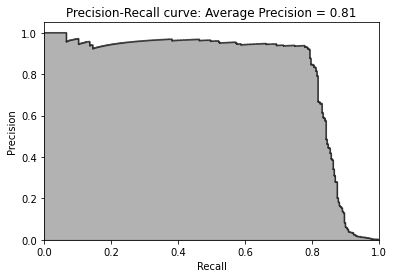

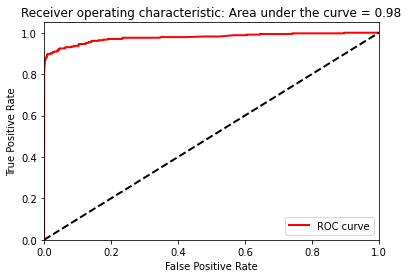

In [65]:
preds = pd.concat([y_train,predictionsBasedOnKFoldsEnsemble.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']

precision, recall, thresholds = \
    precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
    average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

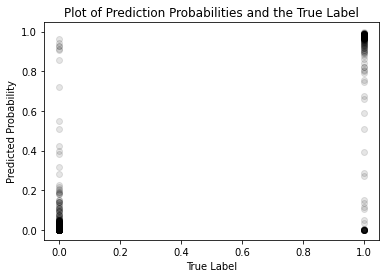

In [66]:
scatterData = predictionsTestSetLightGBMGradientBoosting.join(y_test,how='left')
scatterData.columns = ['Predicted Probability','True Label']
ax = sns.regplot(x="True Label", y="Predicted Probability", color='k', 
                 fit_reg=False, scatter_kws={'alpha':0.1},
                 data=scatterData).set_title( \
                'Plot of Prediction Probabilities and the True Label')

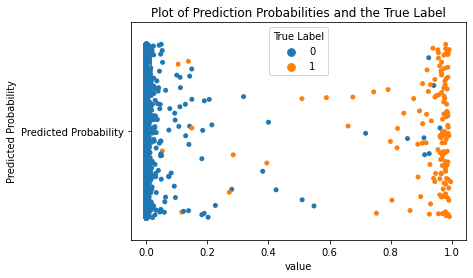

In [67]:
scatterDataMelted = pd.melt(scatterData, "True Label", \
                            var_name="Predicted Probability")
scatterDataMelted.head()
ax = sns.stripplot(x="value", y="Predicted Probability", \
                   hue='True Label', jitter=0.4, \
                   data=scatterDataMelted).set_title( \
                   'Plot of Prediction Probabilities and the True Label')

In [68]:
'''새로운 데이터를 위한 파이프라인'''
# 첫번째, 'newData'로 불리는 데이터 프레임에 새로운 데이터 불러오기
# 두번째, 데이터 스케일
# newData.loc[:,featuresToScale] = sX.transform(newData[featuresToScale])
# 세번째, LightGBM을 사용한 예측
# gbm.predict(newData, num_iteration=gbm.best_iteration)

'새로운 데이터를 위한 파이프라인'

In [69]:
scatterDataMelted.head()

,True Label,Predicted Probability,value
0,0,Predicted Probability,0.000035
1,0,Predicted Probability,0.000020
2,0,Predicted Probability,0.003975
3,0,Predicted Probability,0.000075
4,0,Predicted Probability,0.000035


In [70]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1230.6998376846313 seconds ---
